# <font color='black'> CREDIT DEFAULT CLASSIFICATION </font>
## <font color='black'> DSCI 100 - GROUP 85: GROUP PROJECT REPORT </font>

### <font color='navy'> I. Introduction </font>

This past year, Canada’s inflation rate reached a 30-year high of 5.7% (Evans, 2022). In turn, the increased cost of living has caused a 6.4% increase in credit balances (Senett, 2022). Without a comparable increase in wages, Canadians are at a greater risk of credit card default. Credit default occurs when an individual misses the minimum payment due for six months (Bucci, 2022). Credit default has vast ramifications including weak credit scores and lawsuits.

By exploring precursors to credit default, individuals become equipped to identify warning signs. The following question arises: **will an individual default on their credit payment?**

The “Default of Credit Card Clients” dataset from the UC Irvine Machine Learning Repository allows us to answer this question. It provides data on an individual’s age, sex, highest level of education obtained, marital status, amount of given credit (NTD), history of past payments, bill statement amounts (NTD), monthly payment amounts (NTD), and most importantly, whether this individual had defaulted. 

<img align="left" src="https://media.giphy.com/media/kt6rktnml8cPSdpHF9/giphy.gif" width = "400"/>

Source: https://media.giphy.com/media/kt6rktnml8cPSdpHF9/giphy.gif

### <font color='navy'> II. Methods and Results </font>

Prior to fitting a classification model, we performed a preliminary analysis to clean and wrangle the data while exploring relationships in the dataset.

#### <font color='green'> Exploratory Data Analysis

We begin by loading library packages and setting a seed.

In [1]:
install.packages("readxl")

library(repr)
library(tidyverse)
library(tidymodels)
library(ggplot2)
library(cowplot)
library(readxl)

options(repr.matrix.max.rows = 6)
set.seed(1)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks st

#### <font color='fushsia'> Read the Data </font>

We read the data from the web such that the original dataset with 30,000 rows and 25 columns appears as below:

In [2]:
url1 <- 'https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls'

download.file(url1, destfile = "credit_default.xls")
credit_data <- read_excel("credit_default.xls", skip = 1)
credit_data 

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,⋯,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,20000,2,2,1,24,2,2,-1,-1,⋯,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,⋯,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,⋯,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
29998,30000,1,2,2,37,4,3,2,-1,⋯,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,⋯,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
30000,50000,1,2,1,46,0,0,0,0,⋯,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


The data in each column is as below:
+ `LIMIT_BAL` -- the amount of credit (NTD) given to the individual by the credit company
+ `SEX` -- 1 = male; 2 = female 
+ `EDUCATION` -- 1 = graduate school; 2 = university; 3 = high school; 4 = other
+ `MARRIAGE` -- 1 = married; 2 = single; 3 = other
+ `AGE` -- (years)
+ `PAY_0:PAY_6` -- history of past payment, -1 = pay dult, 1 = payment delay for one month, 2 = payment delay for 2 months, etc.
+ `BILL_AMT1:BILL_AMT6` -- amount of the bill statement (NTD) from April 2005 to September 2005
+ `PAY_AMT1:PAY_AMT6` -- amount of previous payment (NTD) from April 2005 to September 2005

#### <font color='fushsia'> Clean and Wrangle the Data </font>

While the data is already tidy, there are still improvements to be made.

+ First, to provide viewers with a better understanding of the data, we rename the columns to demonstrate the specific month of the year it represents. These months were determined by the authors of the dataset.
+ In addition, we change the data type of the DEFAULT column from double to factor, as this is our target variable.
+ To enable faster run times without significantly sacrificing model accuracy, we select a sample of 15,000 rows for analysis.
+ Finally, to prepare for our predictive model, we split the data into training and testing sets

The table below shows our training data set, with 11,249 rows and 25 columns:

In [3]:
#TIDY THE DATA

tidy_credit_data <- credit_data |>
                    rename(BILL_SEPT = BILL_AMT1,
                           BILL_AUG = BILL_AMT2,
                           BILL_JUL = BILL_AMT3,
                           BILL_JUN = BILL_AMT4,
                           BILL_MAY = BILL_AMT5,
                           BILL_APR = BILL_AMT6,
                           PAY_SEPT = PAY_AMT1,
                           PAY_AUG = PAY_AMT2,
                           PAY_JUL = PAY_AMT3,
                           PAY_JUN = PAY_AMT4,
                           PAY_MAY = PAY_AMT5,
                           PAY_APR = PAY_AMT6,
                           DEFAULT = "default payment next month") |>

                    mutate(DEFAULT= as_factor(DEFAULT)) |>
                    slice_sample(n = 15000) 

#SPLIT DATA INTO TRAINING AND TESTING SUBSETS

credit_split <- initial_split(tidy_credit_data,
                              prop = 0.75, 
                              strata = DEFAULT)
credit_train <- training(credit_split)
credit_test <- testing (credit_split)

credit_train

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,⋯,BILL_JUN,BILL_MAY,BILL_APR,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,DEFAULT
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
17401,200000,2,1,1,49,-1,-1,-1,-1,⋯,950,0,1900,950,950,950,0,1900,950,0
24388,320000,1,1,1,40,-1,-1,-1,-1,⋯,8240,15273,16106,8240,8240,8240,15273,16106,9690,0
13218,320000,2,1,1,42,1,2,2,0,⋯,252323,253557,256525,10000,450,7025,7161,8000,6883,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
10831,10000,1,2,2,22,2,0,0,-1,⋯,528,0,0,1238,1275,528,0,0,0,1
25859,140000,2,2,1,37,-1,-1,-1,-1,⋯,1516,326,1439,326,326,1516,326,1439,326,1
14693,170000,1,2,1,34,1,2,2,2,⋯,64363,55912,54500,3400,0,3957,0,2200,1300,1


#### <font color='fushsia'> Summary Statistics </font>

To gain a better understanding of the dataset, we create a summary tables for both the target variable and potential predictor variables. The target variable summary table is as below:

In [4]:
#SUMMARIZE DEFAULT/NON DEFAULT 

num_obs <- nrow(credit_train)
            credit_train |>
            group_by(DEFAULT) |>
            summarize(Count = n(), Percentage = n() / num_obs * 100)


#CHECK FOR NA VALUES

missing_values <- data.frame(Number_of_Missing_Values = sum(is.na(credit_train)))
missing_values


DEFAULT,Count,Percentage
<fct>,<int>,<dbl>
0,8740,77.6958
1,2509,22.3042


Number_of_Missing_Values
<int>
0


Looking at the target variable summary table, we see that:
+ 78% of credit card clients pay their bills, hence non-default (DEFAULT = 0)
+ 22% of clients default on their credit cards (DEFAULT = 1)
+ There are no missing values in the training data

While considering predictor variables, we notice that the `SEX`, `EDUCATION`, `MARRIAGE`, `PAY_0:PAY_6` columns, though numeric, are discrete variables. Therefore, we choose to exclude them from the data anaylsis. The remaining variables `LIMIT_BAL`, `AGE`, `BILL_SEPT:BILL_APR`, and `PAY_SEPT:PAY_APR` are continuous quantatitive variables. However, inuitively, we believe that the credit limit and age of an individual is less likely to influence whether they will default. As such, we explore the data in the `BILL_` and `PAY_` columns. To determine the average bill statement amount and the average payment amount each month: 

In [5]:
#SUMMARIZE BILL AND PAYMENT 

average_summarize <- credit_train |>
                     select(BILL_SEPT:PAY_APR) |>
                     map_df(mean, na.rm=TRUE) 

average_summarize_bill <- average_summarize |>
                          pivot_longer(cols = BILL_SEPT:BILL_APR,
                                       names_to = "Month",
                                       values_to = "Mean_Amount") |>
                          select(Month:Mean_Amount)
average_summarize_bill

average_summarize_pay <- average_summarize |>
                         pivot_longer(cols = PAY_SEPT:PAY_APR,
                                      names_to = "Month",
                                      values_to = "Mean_Amount") |>
                         select(Month:Mean_Amount)
average_summarize_pay

Month,Mean_Amount
<chr>,<dbl>
BILL_SEPT,52078.22
BILL_AUG,50029.63
BILL_JUL,48032.24
BILL_JUN,44312.64
BILL_MAY,41349.74
BILL_APR,39731.71


Month,Mean_Amount
<chr>,<dbl>
PAY_SEPT,5788.625
PAY_AUG,5940.109
PAY_JUL,5254.558
PAY_JUN,4861.044
PAY_MAY,4661.477
PAY_APR,5126.886


Evidently, the mean bill amount is higher than the mean payment amount each month. While this data is the average across all individuals in the dataset, it implies that there are people who are either not making payments at all or are not paying their credit card bills in full. As such, this is a good indication that bill statement amounts and payment amounts can predict whether an individual will default.

#### <font color='fushsia'> Visualization </font>

To further explore the relationship between bill statement amount, payment amount, and whether an individuals will default, we create several scatter plots with an x-axis of monthly bill statements, a y-axis of monthly payment amounts, and a colour mapping to Default (1) or Non-Default (0).

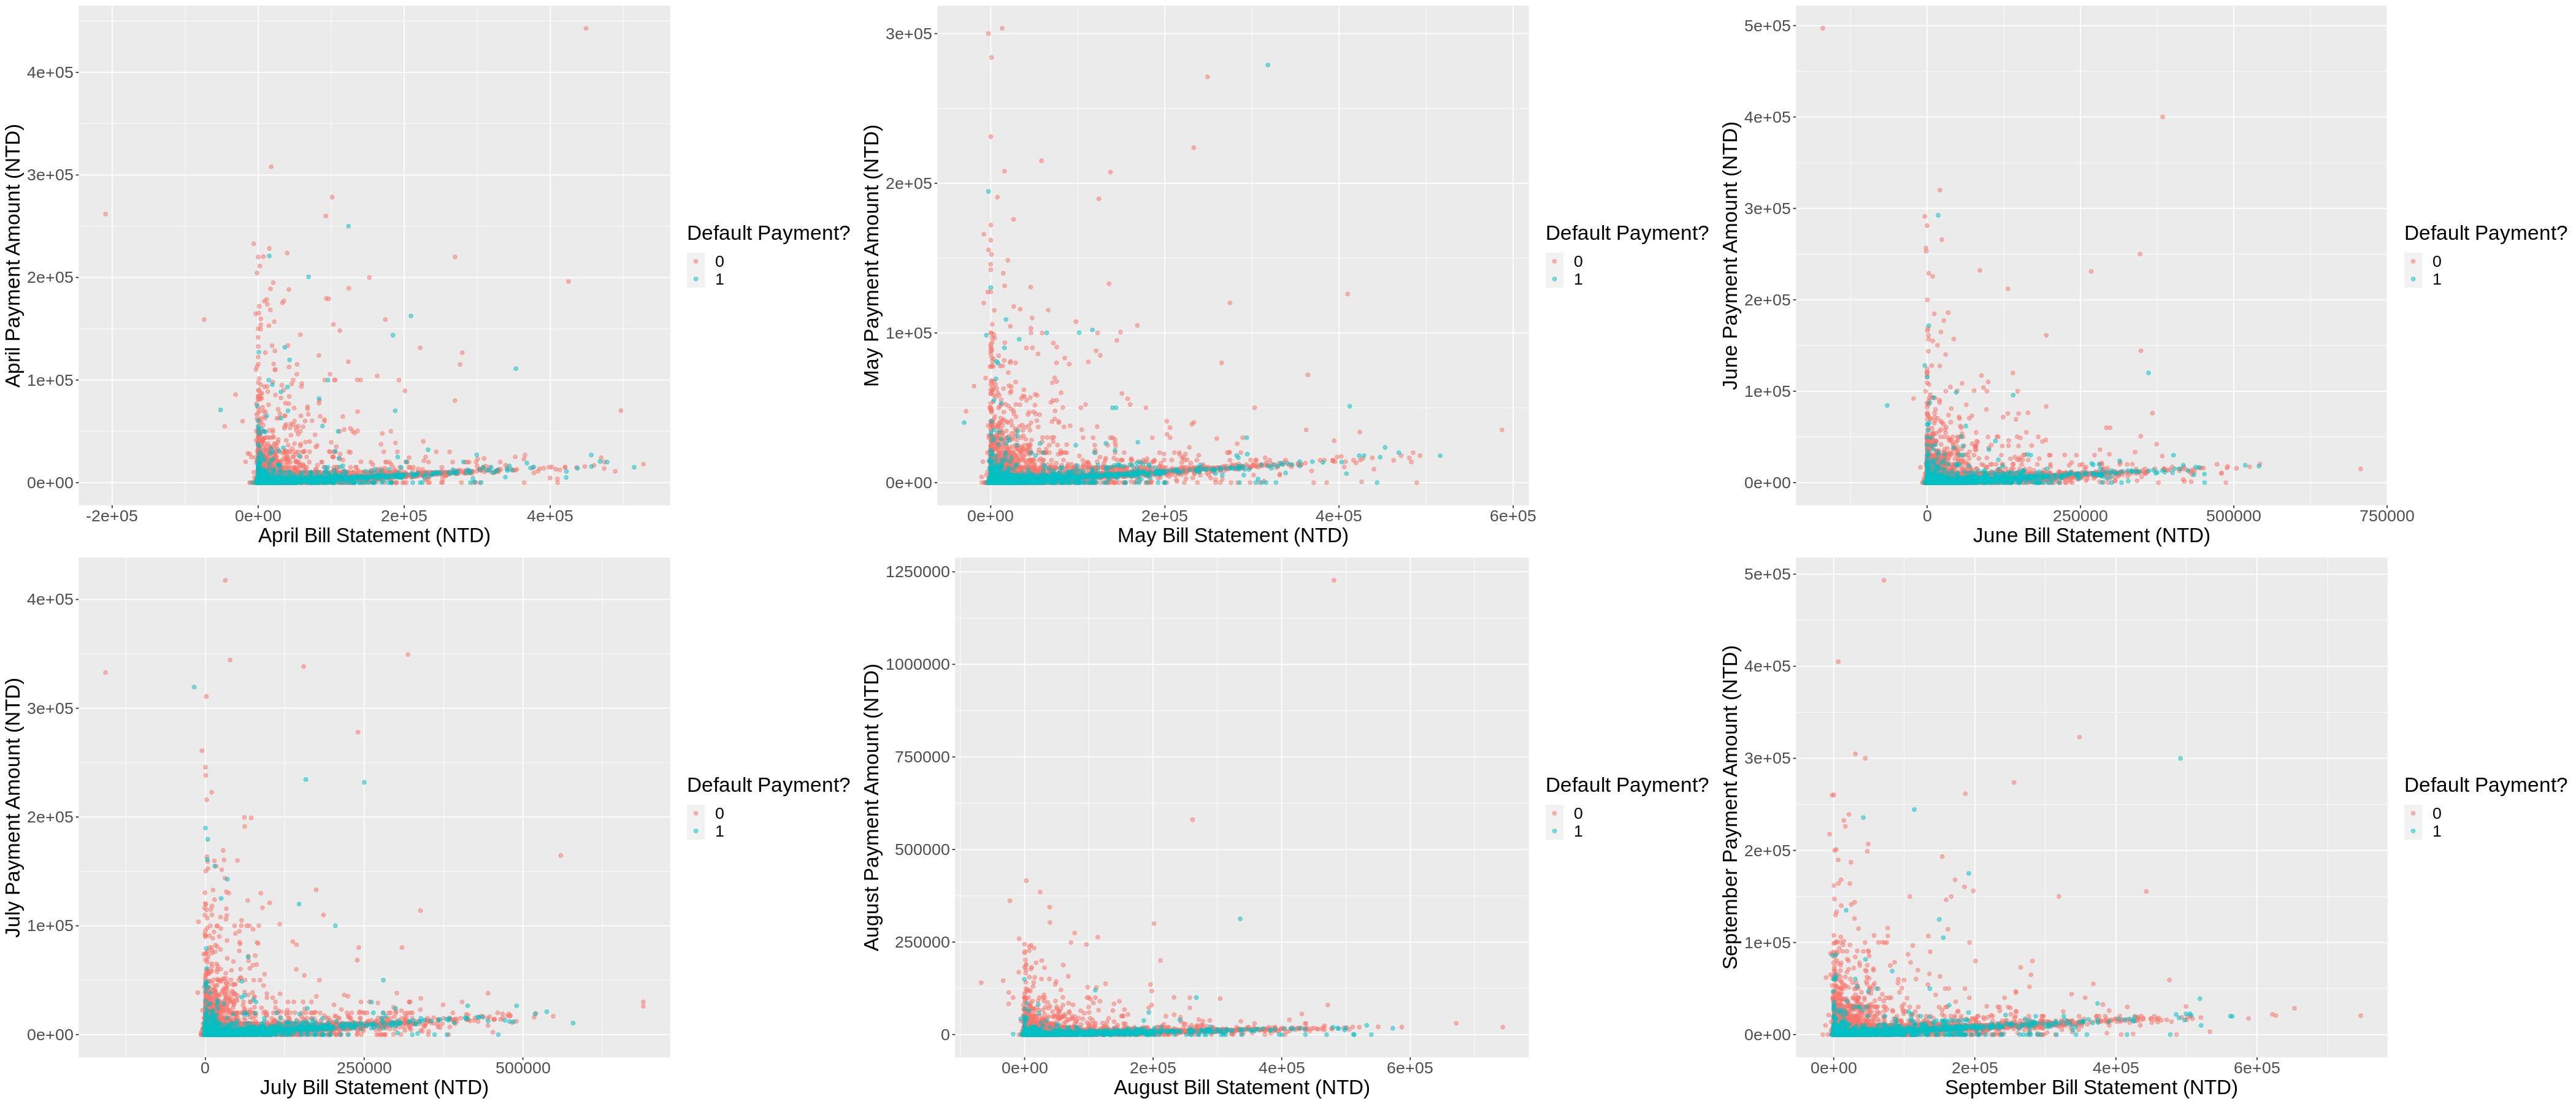

In [6]:
options(repr.plot.width = 35, repr.plot.height = 15)

#VISUALIZING ONE MONTH'S BILL STATEMENT AMOUNT AND PAYMENT AMOUNT

sept_bill_vs_payment <- credit_train |>
                        ggplot(aes(x = BILL_SEPT, y = PAY_SEPT, color = DEFAULT)) +
                        geom_point(alpha = 0.5) +
                        labs(x = "September Bill Statement (NTD)", 
                             y = "September Payment Amount (NTD)", 
                             color = "Default Payment?") +
                        theme(text = element_text(size = 20))

aug_bill_vs_payment <- credit_train |>
                       ggplot(aes(x = BILL_AUG, y = PAY_AUG, color = DEFAULT)) +
                       geom_point(alpha = 0.5) +
                       labs(x = "August Bill Statement (NTD)", 
                            y = "August Payment Amount (NTD)", 
                            color = "Default Payment?") +
                       theme(text = element_text(size = 20))

jul_bill_vs_payment <- credit_train |>
                       ggplot(aes(x = BILL_JUL, y = PAY_JUL, color = DEFAULT)) +
                       geom_point(alpha = 0.5) +
                       labs(x = "July Bill Statement (NTD)", 
                            y = "July Payment Amount (NTD)", 
                            color = "Default Payment?") +
                       theme(text = element_text(size = 20))

jun_bill_vs_payment <- credit_train |>
                       ggplot(aes(x = BILL_JUN, y = PAY_JUN, color = DEFAULT)) +
                       geom_point(alpha = 0.5) +
                       labs(x = "June Bill Statement (NTD)", 
                            y = "June Payment Amount (NTD)", 
                            color = "Default Payment?") +
                       theme(text = element_text(size = 20))

may_bill_vs_payment <- credit_train |>
                       ggplot(aes(x = BILL_MAY, y = PAY_MAY, color = DEFAULT)) +
                       geom_point(alpha = 0.5) +
                       labs(x = "May Bill Statement (NTD)", 
                            y = "May Payment Amount (NTD)", 
                            color = "Default Payment?") +
                       theme(text = element_text(size = 20))

apr_bill_vs_payment <- credit_train |>
                       ggplot(aes(x = BILL_APR, y = PAY_APR, color = DEFAULT)) +
                       geom_point(alpha = 0.5) +
                       labs(x = "April Bill Statement (NTD)", 
                            y = "April Payment Amount (NTD)", 
                            color = "Default Payment?") +
                       theme(text = element_text(size = 20))

#COMPARING ALL SIX MONTHS BESIDE ONE ANOTHER
plot_grid(apr_bill_vs_payment, may_bill_vs_payment,
          jun_bill_vs_payment, jul_bill_vs_payment,
          aug_bill_vs_payment, sept_bill_vs_payment,
          label_size = 12)

From the above plot, it appears that credit defaulting occurs more often when clients make low payment amounts and when the bill statement amount is less than $25,000 NTD. These trends appear across all six months of data. As each month shows a similar trend, we choose to use the July, August, and September as our predictor variables for two reasons. First, as each month passes without a payment made, it becomes more difficult to catch-up. Therefore, analyzing just the latter half of a six-month period is more representative of whether an individual will default because it disregards singular, outlying missed payments. Moreover, reducing the number of predictors ensures that R can process the model in a timely manner.


Performing the exploratory analysis aided our choice of predictor variables and enabled us to better understand the distribution of default and non-default. We will conduct our data analysis using the K-nearest neighbours algorithm. Specifically, we will perform a binary classification to determine if an individual will default or not. Our predictor variables of `BILL_JUL`, `BILL_AUG`, `BILL_SEPT`, `PAY_JUL`, `PAY_AUG`, and `PAY_SEPT` track the amount of debt an individual has amassed over time, and is therefore influential in the classification model. 

#### <font color='green'> Data Analysis

We begin the data analysis by performing cross validation of 5 folds to select an optimal K value for our knn-classification model.

#### <font color='fushsia'> Cross Validation </font>

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.6994392,5,0.002347285,Preprocessor1_Model01
6,accuracy,binary,0.7636228,5,0.002998339,Preprocessor1_Model02
11,accuracy,binary,0.7753572,5,0.002275952,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
36,accuracy,binary,0.7813137,5,0.001821147,Preprocessor1_Model08
41,accuracy,binary,0.7798025,5,0.001958560,Preprocessor1_Model09
46,accuracy,binary,0.7805138,5,0.002201966,Preprocessor1_Model10


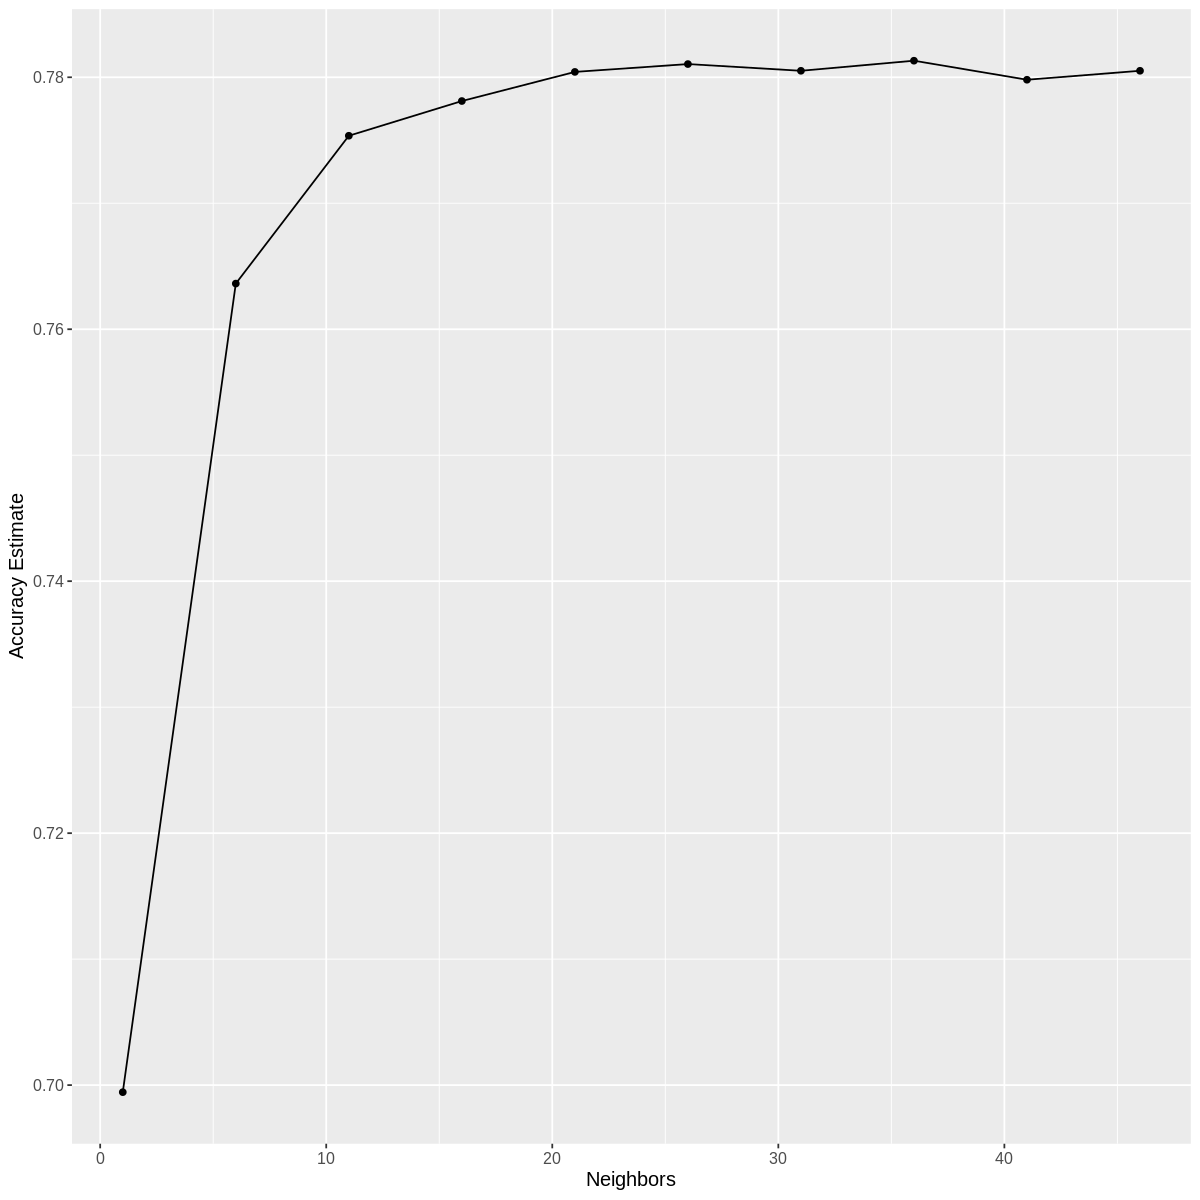

In [7]:
options(repr.plot.height = 10, repr.plot.width = 10)

credit_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
               set_engine("kknn") |>
               set_mode("classification")

credit_vfold <- vfold_cv(credit_train, v = 5, strata = DEFAULT)

credit_recipe <- recipe(DEFAULT ~ BILL_JUL + BILL_AUG + BILL_SEPT
                        + PAY_JUL + PAY_AUG + PAY_SEPT, data = credit_train) |>
                 step_scale(all_predictors()) |>
                 step_center(all_predictors())

k_vals <- tibble(neighbors = seq(from = 1, to = 50, by = 5))

credit_validation_fit <- workflow() |>
              add_recipe(credit_recipe) |>
              add_model(credit_spec) |>
              tune_grid(resamples = credit_vfold, grid = k_vals) |>
              collect_metrics() 

accuracies <- credit_validation_fit |>
              filter(.metric == "accuracy")


accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
                 geom_point() +
                 geom_line() +
                 labs(x = "Neighbors", y = "Accuracy Estimate") + 
                 theme(text = element_text(size = 12))

accuracy_vs_k

We choose the number of neighbours to be 26 as it is between K = 20 and K = 50, such that we get roughly optimal accuracy, changing the K value to a nearby K value doesn't affect accuracy greatly and because the number of neighbours is low enough that running the model isn't very expensive.

With the chosen K value, we build our classification model using the same recipe as created during cross validation.

#### <font color='fushsia'> Model Building  </font>

In [8]:
credit_model_spec <- nearest_neighbor(weight_func = "rectangular", neighbor = 26) |>
              set_engine("kknn") |>
              set_mode("classification")

credit_model_fit <- workflow() |>
             add_recipe(credit_recipe) |>
             add_model(credit_model_spec) |>
             fit(data = credit_train)

credit_predictions <- predict(model_fit, credit_test) |>
                      bind_cols(credit_test) 

credit_metrics <- credit_predictions |>
                  metrics(truth = DEFAULT, estimate = .pred_class) |>
                  filter(.metric == "accuracy")
credit_metrics

credit_conf_mat <- credit_predictions |>
                   conf_mat(truth = DEFAULT, estimate = .pred_class)
credit_conf_mat

.pred_class,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,⋯,BILL_JUN,BILL_MAY,BILL_APR,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,DEFAULT
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,26753,120000,1,1,2,28,0,0,0,⋯,49050,49722,48898,3000,3000,2000,2000,2000,3000,0
0,8462,100000,2,2,2,27,0,0,0,⋯,49290,48372,49412,2400,1776,3800,0,2000,1800,0
0,4050,160000,1,2,1,40,-1,-1,-1,⋯,0,0,0,2941,0,0,0,0,0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
0,28112,210000,2,2,1,36,0,0,0,⋯,15748,16069,13780,1534,1307,1116,437,399,276,0
0,25109,230000,1,2,1,60,0,0,0,⋯,123958,124474,120570,6057,4845,4291,4115,4274,4054,0
0,29335,100000,1,1,2,27,0,0,0,⋯,12092,12429,22315,1171,1303,1023,360,10000,442,0


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7816582


          Truth
Prediction    0    1
         0 2854  759
         1   60   78

Our model has an accuracy of 78%, meaning that it predicts whether an individual defaults correctly 78% of the time. Looking at the confusion matrix, we see that the model predicts that an individual does not default more often than default.

#### <font color='fushsia'> Classification Visualization </font>

To visualize the results of the classifier, we create scatterplots of the month's bill statement amount compared to its payment amount, with a colour mapping to whether or not the prediction was correct. We accomplish this by first adding a new column named `PREDICTION_RESULT` to the `credit_predictions` dataframe. In this new column, "True" means that the classifier correctly predicted whether an individual will default and "False" means that the classifier was incorrect. 

In [9]:
credit_predictions_result <- credit_predictions |>
                             mutate(PREDICTION_RESULT = ifelse(.pred_class == DEFAULT, "True","False"))
credit_predictions_result

.pred_class,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,⋯,BILL_MAY,BILL_APR,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,DEFAULT,PREDICTION_RESULT
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
0,26753,120000,1,1,2,28,0,0,0,⋯,49722,48898,3000,3000,2000,2000,2000,3000,0,True
0,8462,100000,2,2,2,27,0,0,0,⋯,48372,49412,2400,1776,3800,0,2000,1800,0,True
0,4050,160000,1,2,1,40,-1,-1,-1,⋯,0,0,2941,0,0,0,0,0,0,True
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
0,28112,210000,2,2,1,36,0,0,0,⋯,16069,13780,1534,1307,1116,437,399,276,0,True
0,25109,230000,1,2,1,60,0,0,0,⋯,124474,120570,6057,4845,4291,4115,4274,4054,0,True
0,29335,100000,1,1,2,27,0,0,0,⋯,12429,22315,1171,1303,1023,360,10000,442,0,True


Warning message:
“Removed 2 rows containing missing values (geom_point).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”
Warning message:
“Removed 6 rows containing missing values (geom_point).”


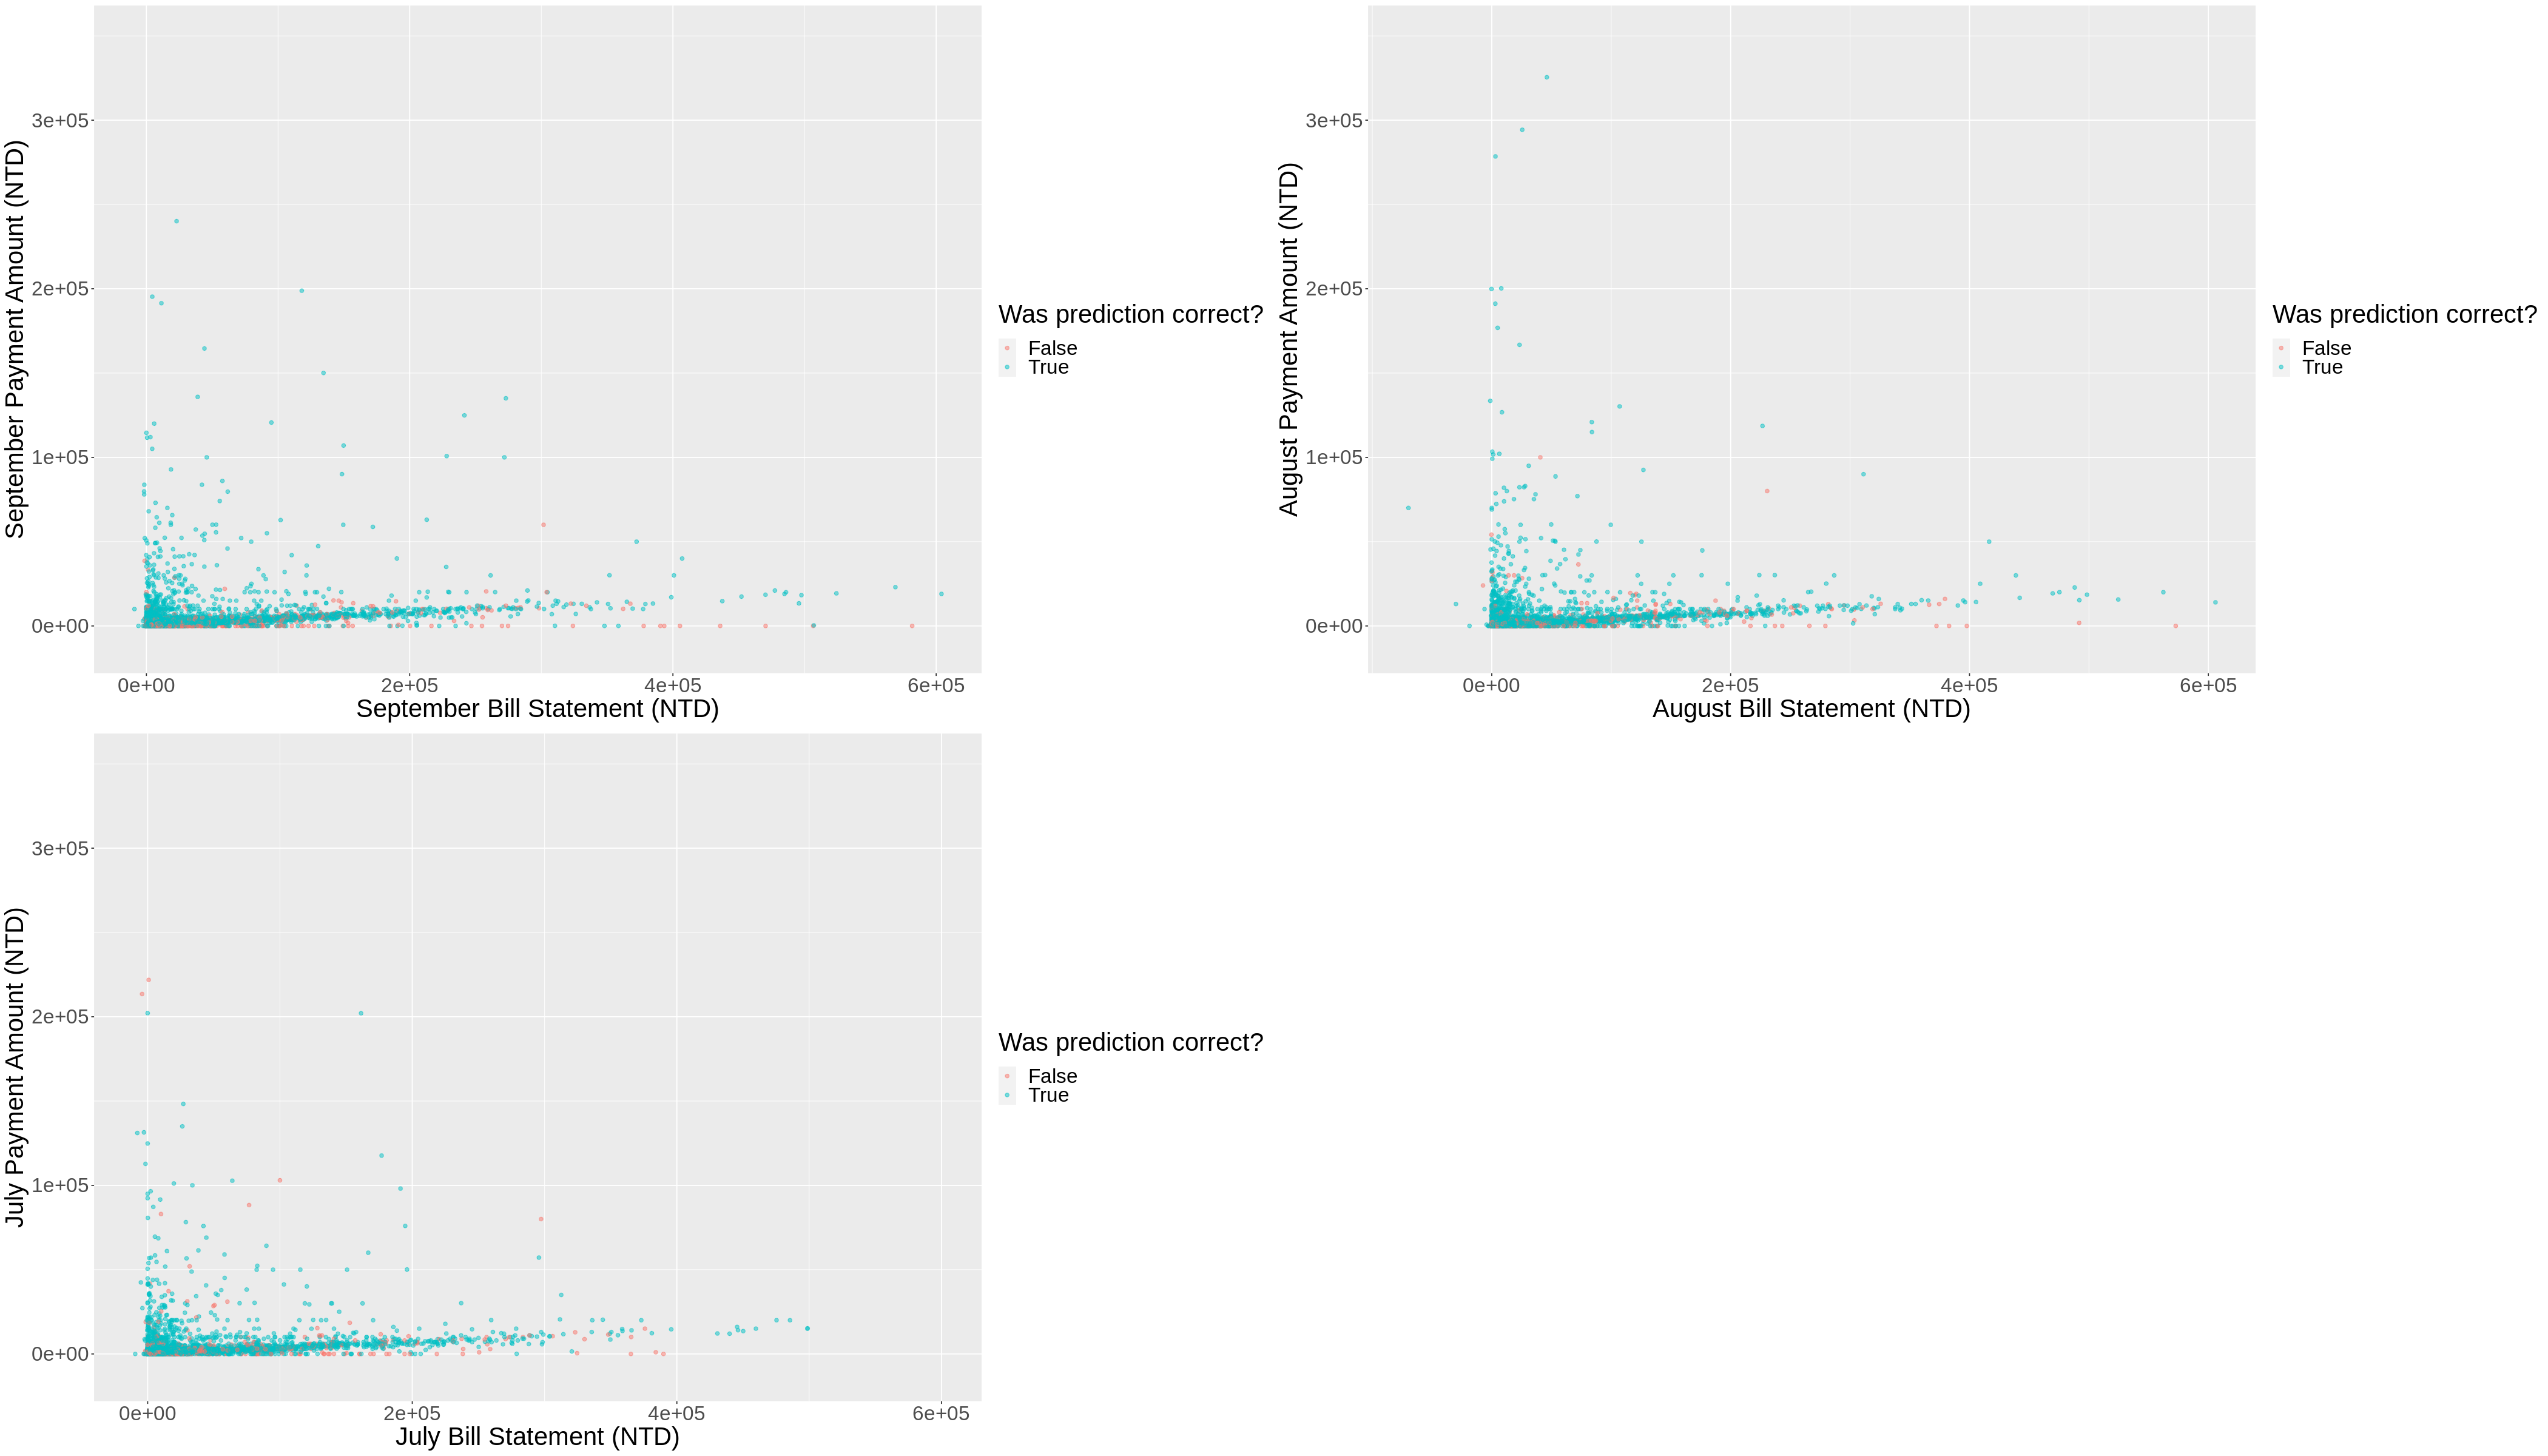

In [17]:
#VISUALIZATION

options(repr.plot.width = 35, repr.plot.height = 20)

sept_bill_vs_payment_result <- credit_predictions_result |>
                               ggplot(aes(x = BILL_SEPT, y = PAY_SEPT, color = PREDICTION_RESULT)) +
                               geom_point(alpha = 0.5) +
                               labs(x = "September Bill Statement (NTD)", 
                                    y = "September Payment Amount (NTD)", 
                                    color = "Was prediction correct?") +
                               ylim(c(-10000, 350000)) +
                               theme(text = element_text(size = 25))

aug_bill_vs_payment_result <- credit_predictions_result |>
                              ggplot(aes(x = BILL_AUG, y = PAY_AUG, color = PREDICTION_RESULT)) +
                              geom_point(alpha = 0.5) +
                              labs(x = "August Bill Statement (NTD)", 
                                   y = "August Payment Amount (NTD)", 
                                   color = "Was prediction correct?") +
                              ylim(c(-10000, 350000)) +
                              theme(text = element_text(size = 25))

july_bill_vs_payment_result <- credit_predictions_result |>
                               ggplot(aes(x = BILL_JUL, y = PAY_JUL, color = PREDICTION_RESULT)) +
                               geom_point(alpha = 0.5) +
                               labs(x = "July Bill Statement (NTD)", 
                                    y = "July Payment Amount (NTD)", 
                                    color = "Was prediction correct?") +
                               xlim(c(-10000, 600000)) +
                               ylim(c(-10000, 350000)) +
                               theme(text = element_text(size = 25))

plot_grid(sept_bill_vs_payment_result,
          aug_bill_vs_payment_result,
          july_bill_vs_payment_result,
          label_size = 40)

### <font color='navy'> III. Method </font>

We will conduct our analysis using the K-nearest neighbours algorithm. Specifically, we will perform a binary classification on the “Default of Credit Card Clients” dataset. The dataset tracks the credit history of individuals from April 2005 to September 2005. As each month passes without a payment made, it becomes more difficult to catch-up. Therefore, we will analyze data from the latter half of the six-month period as it better disregards singular, outlying missed payments. This assumption allows us to answer our question without compromising accuracy or R’s data-processing capacity. 

As the `BILL_*` columns detail the monthly bill statement amount and the `PAY_*` columns report monthly payment amounts, these variables are significant. The two variables allow us to determine the amount of debt the individual has amassed. Hence, we plan to use the columns `BILL_JUL`, `BILL_AUG`, `BILL_SEPT`, `PAY_JUL`, `PAY_AUG`, and `PAY_SEPT` as our predictor variables.

To visualize the data, we plan to create a scatter plot of each month's bill payment against each month's payment amount and use colour to differentiate whether the individual had defaulted. 

### <font color='navy'> IV. Expected Outcomes and Significance </font>

From the above plot, it appears that credit defaulting occurs more often when clients make low payment amounts and when the bill statement amount is less than $25,000 NTD. These trends appears across all six months of data. As such, we expect that the model will classify data as 1 (credit default) when monthly payment amounts and bill statment amounts are low.

These findings can help both credit card clients and financial institutions identify warning signs to credit default. In turn, this allows individuals to plan ahead and assists financial institutions in risk assessment. An accurate prediction can help in balancing risk and return for the banks; charging higher rates for higher risks, or even denying new credits when required.

This project explores just one of many aspects of credit default, thereby leading to the future questions of:
- How do categorical variables of sex, education, and marital status affect whether an individual defaults?
- How do bill statement and monthly payment amounts affect an individual when applying for new credit cards?

### <font color='navy'> References

Bucci, S. (2022, April 26). Credit card default: What to do about it. Bankrate. Retrieved October 25, 2022, from https://www.bankrate.com/finance/credit-cards/credit-card-default/ 

Evans, P. (2022, March 16). Canada's inflation rate now at 30-year high of 5.7%. CBCnews. Retrieved October 25, 2022, from https://www.cbc.ca/news/business/canada-inflation-february-1.6386536 

Senett, K. (2022, September 23). How much credit card debt does the average Canadian have? MoneySense. Retrieved October 25, 2022, from https://www.moneysense.ca/save/debt/how-much-credit-card-debt-does-the-average-canadian-have/ 

Wilke, C. O. (2020, December 15). Introduction to cowplot. R/CRAN. Retrieved October 25, 2022, from https://cran.r-project.org/web/packages/cowplot/vignettes/introduction.html

Yeh, I.-C. (2009). Default of Credit Card Clients Data Set. UCI Machine Learning Repository. Retrieved October 25, 2022, from https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients 